In [65]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=32

In [5]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "plantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
    #labels='inferred',
    #label_mode='int',
    #class_names=None,
    #color_mode='rgb',
    #seed=None,
    #validation_split=None,
    #subset=None,
    #interpolation='bilinear',
    #follow_links=False,
    #crop_to_aspect_ratio=False,
    #**kwargs
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
#eploring the data
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())#tensors to numpy array

(32, 256, 256, 3)
[1 0 1 1 0 1 0 2 1 1 0 1 0 1 0 0 1 0 0 0 1 2 2 1 1 1 2 0 0 1 1 1]


There are 32 images size 256*256 and an RGB(channels=3)

In [9]:
#printing 1st image
print(image_batch[0]) #printing a tensor

tf.Tensor(
[[[134. 128. 142.]
  [128. 122. 136.]
  [126. 120. 134.]
  ...
  [108.  98. 109.]
  [112. 102. 113.]
  [115. 105. 116.]]

 [[140. 134. 148.]
  [139. 133. 147.]
  [142. 136. 150.]
  ...
  [108.  98. 109.]
  [111. 101. 112.]
  [114. 104. 115.]]

 [[139. 133. 147.]
  [144. 138. 152.]
  [151. 145. 159.]
  ...
  [109.  99. 110.]
  [108.  98. 109.]
  [107.  97. 108.]]

 ...

 [[150. 142. 153.]
  [149. 141. 152.]
  [147. 139. 150.]
  ...
  [109.  98. 104.]
  [108.  97. 103.]
  [108.  97. 103.]]

 [[155. 147. 158.]
  [152. 144. 155.]
  [149. 141. 152.]
  ...
  [103.  92.  98.]
  [106.  95. 101.]
  [110.  99. 105.]]

 [[162. 154. 165.]
  [158. 150. 161.]
  [154. 146. 157.]
  ...
  [ 97.  86.  92.]
  [101.  90.  96.]
  [108.  97. 103.]]], shape=(256, 256, 3), dtype=float32)


In [10]:
#converting to a numpy
print(image_batch[0].numpy())

[[[134. 128. 142.]
  [128. 122. 136.]
  [126. 120. 134.]
  ...
  [108.  98. 109.]
  [112. 102. 113.]
  [115. 105. 116.]]

 [[140. 134. 148.]
  [139. 133. 147.]
  [142. 136. 150.]
  ...
  [108.  98. 109.]
  [111. 101. 112.]
  [114. 104. 115.]]

 [[139. 133. 147.]
  [144. 138. 152.]
  [151. 145. 159.]
  ...
  [109.  99. 110.]
  [108.  98. 109.]
  [107.  97. 108.]]

 ...

 [[150. 142. 153.]
  [149. 141. 152.]
  [147. 139. 150.]
  ...
  [109.  98. 104.]
  [108.  97. 103.]
  [108.  97. 103.]]

 [[155. 147. 158.]
  [152. 144. 155.]
  [149. 141. 152.]
  ...
  [103.  92.  98.]
  [106.  95. 101.]
  [110.  99. 105.]]

 [[162. 154. 165.]
  [158. 150. 161.]
  [154. 146. 157.]
  ...
  [ 97.  86.  92.]
  [101.  90.  96.]
  [108.  97. 103.]]]


C:\Users\otien\AppData\Local\Temp\ipykernel_2400\951527500.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(3,4,i+1);


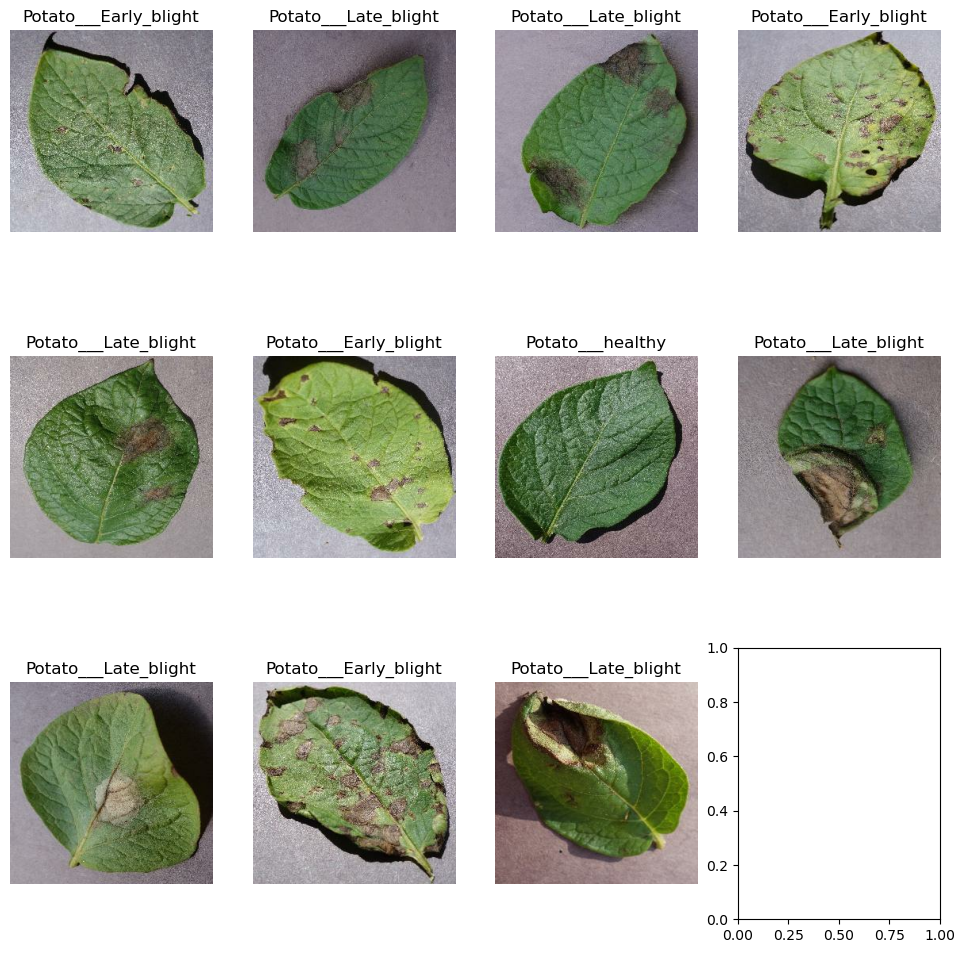

In [103]:
#visualizing the dataset
plt.figure(figsize=(12,12))
for i in range(12):
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])
    ax=plt.subplot(3,4,i+1);
   

In [12]:
#splittiing the dataset into train, test and validation
len(dataset)

68

In [13]:
# Distribution:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [14]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds=dataset.take(54)
len(train_ds) 

54

In [16]:
test_ds=dataset.skip(54) #54 onwards
len(test_ds)

14

In [17]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds=test_ds.take(6)
len(val_ds) 

6

In [19]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [20]:
#simplified spliting using python function
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=1000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    #train_dataset
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)  #giving remaining 20% samples
    
    test_ds = ds.skip(train_size).take(val_size)
    return train_ds, val_ds, test_ds


In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(test_ds)

6

In [24]:
len(val_ds)

6

### Fetching
##### this will read the image from the disk and then for the next iteration when you need the same image, it will keep thaht image in the memory therefore improving performance of the pipeline

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
#pre-processing RGB scale
resize_and_rescale = tf.keras.Sequential([
    #preprocessing pipeline
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [27]:
#using data augmentation to make the model robust (captures rotated images,low/high contrasts)
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### CNN

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
    
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [31]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/32
54/54 [==============================] - 254s 4s/step - loss: 2.1720 - accuracy: 0.4873 - val_loss: 0.8959 - val_accuracy: 0.4682
Epoch 2/32
54/54 [==============================] - 227s 4s/step - loss: 0.6567 - accuracy: 0.6811 - val_loss: 0.3987 - val_accuracy: 0.8339
Epoch 3/32
54/54 [==============================] - 227s 4s/step - loss: 0.3985 - accuracy: 0.8264 - val_loss: 0.3088 - val_accuracy: 0.8675
Epoch 4/32
54/54 [==============================] - 225s 4s/step - loss: 0.2283 - accuracy: 0.8976 - val_loss: 0.2579 - val_accuracy: 0.8837
Epoch 5/32
54/54 [==============================] - 226s 4s/step - loss: 0.2007 - accuracy: 0.9190 - val_loss: 0.1987 - val_accuracy: 0.9144
Epoch 6/32
54/54 [==============================] - 225s 4s/step - loss: 0.1867 - accuracy: 0.9248 - val_loss: 0.1260 - val_accuracy: 0.9537
Epoch 7/32
54/54 [==============================] - 226s 4s/step - loss: 0.2193 - accuracy: 0.9126 - val_loss: 0.1723 - val_accuracy: 0.9294
Epoch 8/32
54

In [32]:
#running a test model
scores = model.evaluate(test_ds)

54/54 [==============================] - 40s 744ms/step - loss: 0.0404 - accuracy: 0.9850


In [33]:
scores

[0.04040283337235451, 0.9849537014961243]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 32, 'steps': 54}

In [36]:
# check the keys of history object
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [41]:
history.history["accuracy"]

[0.48726850748062134,
 0.6811342835426331,
 0.8263888955116272,
 0.8975694179534912,
 0.9189814925193787,
 0.9247685074806213,
 0.9126157164573669,
 0.9160879850387573,
 0.9351851940155029,
 0.9409722089767456,
 0.9340277910232544,
 0.9473379850387573,
 0.9467592835426331,
 0.9629629850387573,
 0.9675925970077515,
 0.953125,
 0.9693287014961243,
 0.9577546119689941,
 0.9670138955116272,
 0.9670138955116272,
 0.9722222089767456,
 0.9704861044883728,
 0.9565972089767456,
 0.9623842835426331,
 0.9739583134651184,
 0.9710648059844971,
 0.9785879850387573,
 0.9375,
 0.9728009104728699,
 0.9780092835426331,
 0.9733796119689941,
 0.9756944179534912]

In [42]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

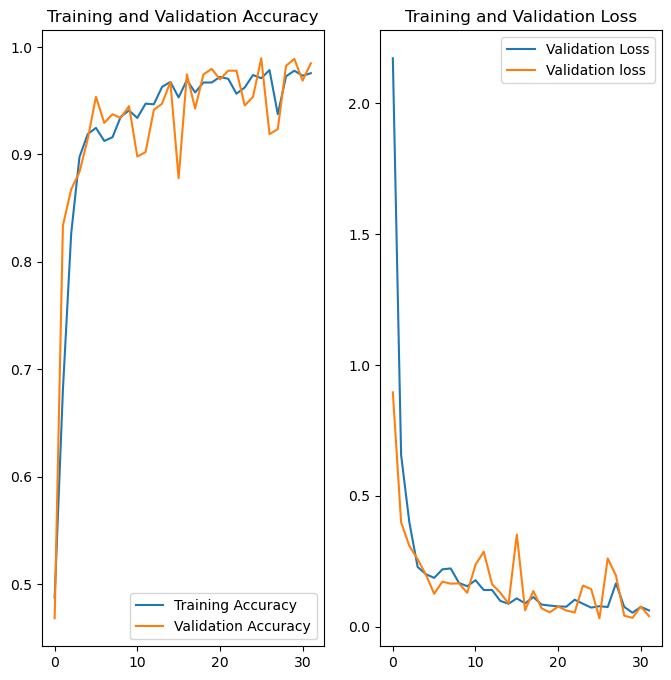

In [49]:
#accuracy chart
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


#loss chart
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label="Validation Loss")
plt.plot(range(EPOCHS), val_loss,label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

### Making Predictions

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Late_blight


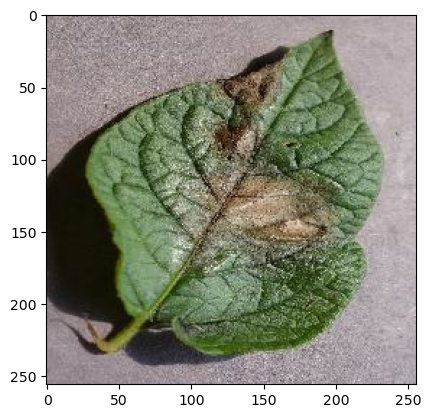

In [94]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype("uint8"))
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)

    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

In [125]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[1].numpy())
    img_array = tf.expand_dims(img_array,0) #creating a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 79ms/step


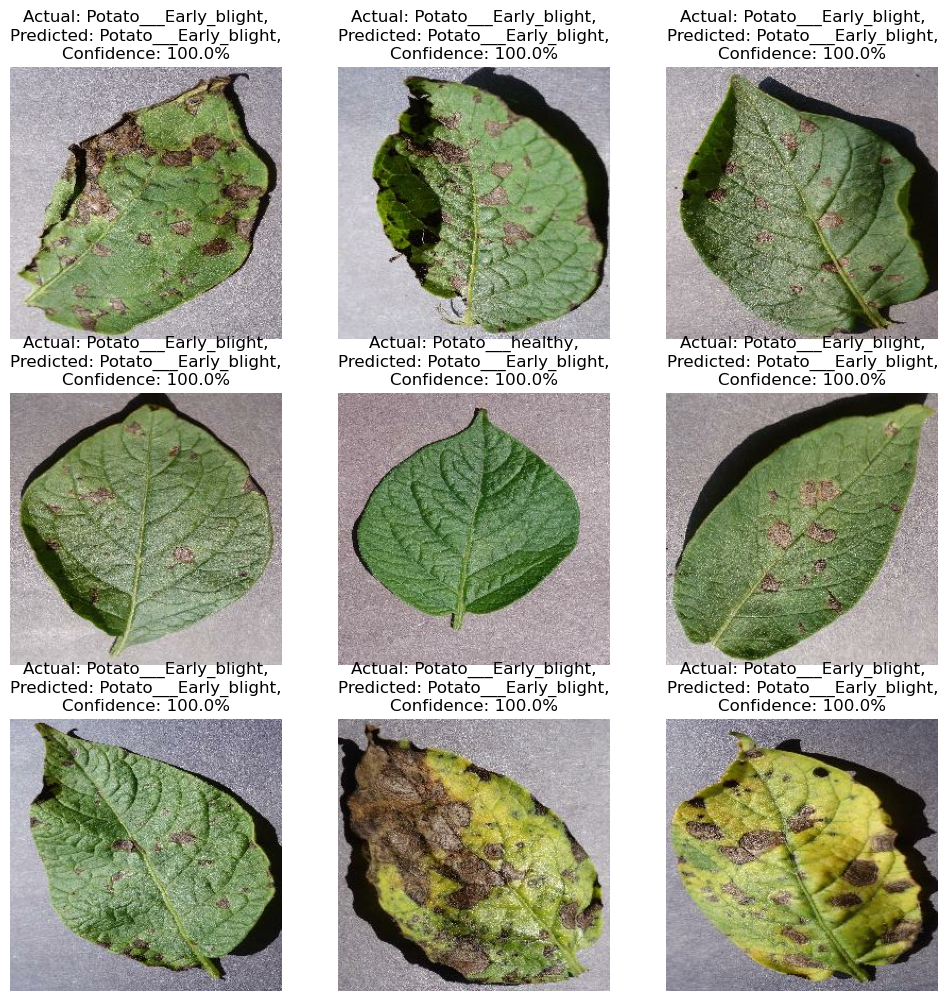

In [160]:
plt.figure(figsize=(12,12))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.axis("off")
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")

In [163]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
